Probabilistic Roadmap Planners (PRM)
====================================
**General Information about document**

This worksheet **explains the basic concepts of path planning using a probablistic roadmap approach (PRM)** needed for the course "InnoKonz WS2021". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This work-sheet should include all necessary incredience to implement different PRM algorithm for path planning applications in Python.

**Attention**: This worksheet has external dependencies 

* to the files "collisionchecker.py". This file can be generated via the notebook Test_Environemnt.

**Prerequisite**:

* Please read the notebook 4_InnoKonz_Graph for understanding the networkx graph library and it's use

Important links are:

    General Info: http://www.python.org
    Python tutorial http://www.python.org/doc/tut/
    NetworkX http://networkx.github.io/
    NumPy and SciPy Guide http://docs.scipy.org/
    Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html

Remember that:

    you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
    you can execute the whole notebook by Cell->runAll





# Why probabilistic

* Existing **complete algorithms** become practically useless unless DOF is low (between 3 and 6).
  * Computation complexity for high-dimensional configuration spaces grows exponentially
  * Complete, general purpose algorithms are at best exponential.
* Complete solutions can hardly be used for rigid objects translating and rotating in 3D.
* Complete solutions can only used for 6-DOF manipulator arms when using “complicated-hard-to-implement” extensions.


**General Idea**: Trade a **limited amount of completeness** against a **major gain in computing efficiency**.

With PRMs, we only get one glimpse of C-Space.


# PRM - Principle

PRMs search takes place in implicit C-Space (C). The planner consists of two phases:

  * **Learning Phase**
    * Create randomly chosen [or in other sophisticated ways] configurations in C-space
    * Connect configurations by a local planner
    * Create Graph
      * each configuration is a node
      * a path between two configurations is an edge between corresponding nodes
  * A **Query Phase** 
    * Find a path from the start and goal configurations to two nodes of the roadmap
    * Search the graph to find a sequence of edges connecting those nodes in the roadmap --> collision free path
    

## Learning Phase

1. **Start** with an **empty Graph**: $G = (V, E)$
2. **Repeatedly** generate a random **free configuration** and **add** it to V
3. **For every new node** (vertex), $c$, select a number of nodes $n_i$ from $V$ and try to connect $c$ to each of them using a line test.
4. **If a path is found** between $c$ and the selected node $n$, **the edge** $(c,n)$ is added to $E$. 

**Remark**: There are now plenty ways to change/adpat this algorithm. Therefore there are a huge number of publications about this algorithm.


## Basic - PRM - Algorithm

Graph: $G(V,E)$

1. $V \leftarrow \emptyset$ and $E \leftarrow \emptyset$
2. Loop
   
   1. $c \leftarrow$ a **randomly** chosen **free configuration** 
   2. $V_c \leftarrow$ a set of candidate neighbors of $c$ chosen from $V$
   3. $V \leftarrow V \cup \{c\}$   
   4. **ForAll** $n \in V_c$ in order of increasing distance from $c$ and $n$ do
      
      * **if** ( not in same_connected_component(c,n) **AND** line between $c$ and $n$ is collision free) **then**
      
        * $E \leftarrow E \cup \{(c,n)\}$
        * update G's connected components

### Example

#### Set-up

<img src="img/prm_init.png" width=400em/>

#### Generate randomly free configuration

1. Generate a vertex $n$ depending on a chosen sampling strategy (Important parameter regarding planning time).

   * “Basic-PRM” uses uniform sampling over the given limits of every dimension of $C$ using the uniform probability distribution over this interval. 

* Check whether configuration $n$ is “free”
* If $n$ is collision free, add $n$ to $V$, otherwise discard.

<img src="img/prm_1.png" width=400em/>

### Find neighbours $V_c$

* $V_c = \{ c' \in V | D(c,c') \leq maxdist\}$, $V_c$: all nodes, that are in a given distance defined by a distance-function $D$.
* $D$ is typically the Euclidean distance of node $c$ and node $c'$

<img src="img/prm_2.png" width=400em/>

According to the algorithm (s. step B.), all neighbor nodes of the new generate node $c$ are generated and stored in $V_c$. As there are now nodes nearby (green circle is empty), a new node is generated

<img src="img/prm_3.png" width=400em/>

Again no node nearby the newly generated node. Therefore $V_c$ is empty. Generate new nodes 

<img src="img/prm_4.png" width=400em/>

This repeats until there are nodes neraby the new generated node

<img src="img/prm_5.png" width=400em/>

In increasing distance test, whether the newly generated node can be collision-free connected to the nearby nodes stored in $V_c$.

<img src="img/prm_6.png" width=400em/>

and

<img src="img/prm_7.png" width=400em/>

Keep repeating the gneration of new nodes

<img src="img/prm_8.png" width=400em/>

until you can connect them collision free:

<img src="img/prm_9.png" width=400em/>

if yes, then generate an edge $\{(c,c')\}$ to $E$: $E \leftarrow E \cup \{(c,c')\}$ and update the connected components:

<img src="img/prm_10.png" width=400em/>

continue until all nodes in $V_c$ are tested:

<img src="img/prm_11.png" width=400em/>

and update the connected components:

<img src="img/prm_12.png" width=400em/>



continue generating nodes and connecting them:

<img src="img/prm_14.png" width=400em/>

Continue but **take care of the second condition (s. if-clause in D.)**. 

<img src="img/prm_15.png" width=400em/>

Always connect to the nearest neighbour:

<img src="img/prm_16.png" width=400em/>

and update the connected component:

<img src="img/prm_17.png" width=400em/>

But besides checking for a collision-free connection (this is only one part of the if-clause)

<img src="img/prm_18.png" width=400em/>

The node should not already be in the same connected component. If so, don't add the connection:

<img src="img/prm_17.png" width=400em/>

Continue this algorithm (learning-phase) until a given criteria (e.g. numbers of nodes to be generated randomly. At the end - hopefully - a good roadmap is generated.

<img src="img/prm_19.png" width=400em/>



#### Query phase

Now that the roadmap is generated, we are able to search a collision free path on that roadmap.

Therefore the start and the goal positions are added to the graph and it is tried to connect them to nodes on the graph (typically the nearest one. If not possible looking in increasing distance).

Connect start $s$ and goal $g$ to nearst nodes on the $G$: $\hat{s}$ and $\hat{g}$

<img src="img/prm_20.png" width=400em/>

Search path in roadmap using a graph search algorithm. A typicall one is the $A^*$ (A-star):

<img src="img/prm_21.png" width=400em/>

Then collect the path:

<img src="img/prm_22.png" width=400em/>



**Remark**: The algorithm will not find the shortest path! See following example:

<img src="img/prm_23.png" width=400em/>



Setting up a basic PRM-Algorithm
===============================

Import modules
--------------

following modules will be needed to run this notebook, especially two new modules are used **random** and **scipy.spatial.distance**:

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline

import networkx as nx  # Library for hanling graphs (please check 4_Introduction_Graph)
import random # possibility to create random numbers (The "P" in PRM)
import numpy as np
import math

# sort nearest neighbour brute force
import heapq

# reduce coding effort by using function provided by scipy
from scipy.spatial.distance import euclidean

Needed functionality
--------------------

* Random position generator (Sampling strategy)
* Computation of **nearest neighbours** for a given node
* Test of connected components
* Collision test (point and **line**): Please take care, we also need a **line test**.


Random position generator
-------------------------

Generate random position in configuration space.

In [23]:
dim = 2
# configure random generator with in the limits of [0,100]
# (should normally be the limits of the planning space e.g. limits of the joints of the robot
print("A random number", random.uniform(0,100))

pos = [random.uniform(0,100) for i in range(dim)] 
print("A random position", pos)

pos2 = list()
for i in range(dim):
    pos2.append(random.uniform(0,100))
    
print("A random position", pos2)
#pos = [random.uniform(0,100),  random.uniform(0,100), random.uniform(0,100),random.uniform(0,100),random.uniform(0,100),random.uniform(0,100)] 
#print("A random position", pos)

A random number 50.84157464177179
A random position [82.78302319786509, 81.22130118452007]
A random position [72.32762016824199, 58.87397321598533]


Nearest Neighbours
------------------

Find the nearest neighbours in a given distance (= radius). See following situations:

At the beginning:

<img src="img/prm_2.png" width=400em/>

or having already done some iterations

<img src="img/prm_15.png" width=400em/>

### Brute Force

The examples are using the graph library NetworkX. For deeper information, please consult the corresponding notebook or  check:  NetworkX http://networkx.github.io/. 

In [24]:
def nearestNeighboursX(pos, graph, radius):
    """ Brute Force method to find all nodes of a 
    graph near the given position **pos** with in the distance of
    **radius** in **increasing order**"""
    
    heap = list()
    for node in graph.nodes(data=True): # using (data=True) will generate a list of nodes with all attributes
        if euclidean(node[1]['pos'],pos) < radius:
            # use a heap-queue to sort the nodes in increasing order
            heapq.heappush(heap, (euclidean(node[1]['pos'] ,pos), node))
            #if len(heap) > 10:
            #    break

    result = list()
    while len(heap) > 0 :
         result.append(heapq.heappop(heap)) 
    
    return result

Test:

In [25]:
G = nx.Graph()

for i in range(10):
    pos = [random.uniform(0,100) for a in range(2)]
    G.add_node( i, pos = pos )

G.nodes(data=True)

NodeDataView({0: {'pos': [38.14176713298691, 44.10695625378357]}, 1: {'pos': [35.250503634291505, 98.32128585371248]}, 2: {'pos': [97.40340684711384, 41.84276343300919]}, 3: {'pos': [64.34575728211784, 0.445385231420492]}, 4: {'pos': [16.824969933596034, 46.184116521119314]}, 5: {'pos': [68.91869921552207, 57.916164837099785]}, 6: {'pos': [14.615354720213592, 72.19717938760445]}, 7: {'pos': [30.303861172766478, 81.17983654702937]}, 8: {'pos': [39.60732300802602, 47.36124500169695]}, 9: {'pos': [67.97792089836251, 55.48260894370478]}})

In [26]:
pos_graph = nx.get_node_attributes(G,'pos')

In [27]:
pos_graph

{0: [38.14176713298691, 44.10695625378357],
 1: [35.250503634291505, 98.32128585371248],
 2: [97.40340684711384, 41.84276343300919],
 3: [64.34575728211784, 0.445385231420492],
 4: [16.824969933596034, 46.184116521119314],
 5: [68.91869921552207, 57.916164837099785],
 6: [14.615354720213592, 72.19717938760445],
 7: [30.303861172766478, 81.17983654702937],
 8: [39.60732300802602, 47.36124500169695],
 9: [67.97792089836251, 55.48260894370478]}

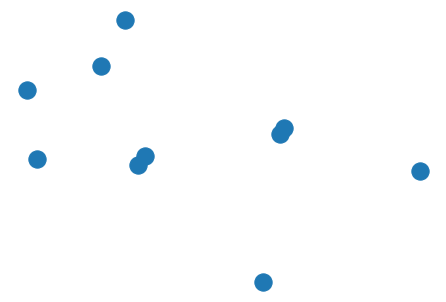

In [28]:
nx.draw(G, pos = pos_graph)

In [29]:
for node in G.nodes(data=True):
    print(node)
    print(node[1]["pos"])

(0, {'pos': [38.14176713298691, 44.10695625378357]})
[38.14176713298691, 44.10695625378357]
(1, {'pos': [35.250503634291505, 98.32128585371248]})
[35.250503634291505, 98.32128585371248]
(2, {'pos': [97.40340684711384, 41.84276343300919]})
[97.40340684711384, 41.84276343300919]
(3, {'pos': [64.34575728211784, 0.445385231420492]})
[64.34575728211784, 0.445385231420492]
(4, {'pos': [16.824969933596034, 46.184116521119314]})
[16.824969933596034, 46.184116521119314]
(5, {'pos': [68.91869921552207, 57.916164837099785]})
[68.91869921552207, 57.916164837099785]
(6, {'pos': [14.615354720213592, 72.19717938760445]})
[14.615354720213592, 72.19717938760445]
(7, {'pos': [30.303861172766478, 81.17983654702937]})
[30.303861172766478, 81.17983654702937]
(8, {'pos': [39.60732300802602, 47.36124500169695]})
[39.60732300802602, 47.36124500169695]
(9, {'pos': [67.97792089836251, 55.48260894370478]})
[67.97792089836251, 55.48260894370478]


In [30]:
G = nx.Graph()

for i in range(100):
    pos = [random.uniform(0,100) for a in range(2)]
    G.add_node( i, pos = pos )

pos = [10.0, 10.0]

#print(G.nodes(data=True))

result = nearestNeighboursX(pos, G, 10.0)

In [31]:
print(result)

[(3.7561266134218037, (69, {'pos': [13.745111931473652, 9.712556515486536]}))]


In [32]:
for data in result:
    print(data)
    print("name", data[1][0])
    print("daten", data[1][1]["pos"])
    print("abstand", data[0])

(3.7561266134218037, (69, {'pos': [13.745111931473652, 9.712556515486536]}))
name 69
daten [13.745111931473652, 9.712556515486536]
abstand 3.7561266134218037


In [33]:
for idx, data in enumerate(result):
    print(idx, data)

0 (3.7561266134218037, (69, {'pos': [13.745111931473652, 9.712556515486536]}))


Check connectivity
------------------


As previously described, we need the functionality to test whether a node is in the same connected component. Following situation should be "filtered out". Therefore it is essential to find out, whethere a node is already in the same connected component.


<img src="img/prm_18.png" width=400em/>



In [34]:
def inSameConnectedComponent(node1, node2, graph):
    """ Check whether to nodes are part of the same connected component using
        functionality from NetworkX
    """
    for connectedComponent in nx.connected_components(G):
        if (node1 in connectedComponent) & (node2 in connectedComponent):
            return True
        
    return False

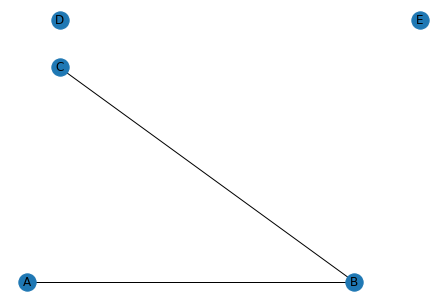

In [35]:
G_graph = nx.Graph()
G_graph.add_node("A", pos = [0,1])

G_graph.add_node("B", pos = [10,1])
G_graph.add_node("C", pos = [1,10])
G_graph.add_node("D", pos = [1,12])
G_graph.add_node("E", pos = [12,12])


G_graph.add_edge("A","B")
G_graph.add_edge("B","C")

pos = nx.get_node_attributes(G_graph,'pos')

nx.draw(G_graph, pos = pos, with_labels=True)   

In [36]:
for comp in nx.connected_components(G_graph):
    print(comp)
    print ("Is A in this component?", "A" in comp)


{'B', 'C', 'A'}
Is A in this component? True
{'D'}
Is A in this component? False
{'E'}
Is A in this component? False


In [37]:
test = ["a","b","c"]
"a" in test

True

Basic Approach
==============

As discussed in the lecture, the basic PRM consists of two phases: **Learning Phase** and the **Query Phase**. In the Learning Phase a roadmap is generated. In the Query Phase the start position and the goal position are connected to that roadmap and a path on this roadmap is searched.

Learning Phase
--------------
In the Learning Phase the roadmap is generated.

### Simple approach
In a straight forward approach the roadmap is constructed by 

1. randomly generating free nodes
2. connect these free nodes to nodes of the roadmap in a certain distance or/and restrict this to certain amount of nodes from the roadmap





Generate **random free** nodes:

<img src="img/prm_1.png" width=400em/>

Following function can be defined


In [38]:
import random

def getRandomFreePosition(collChecker):
    limits = collChecker.getEnvironmentLimits()        
    pos = [random.uniform(limit[0],limit[1]) for limit in limits]
    while collChecker.pointInCollision(pos):
        pos = [random.uniform(limit[0],limit[1]) for limit in limits]
    return pos

In [39]:
import collisionchecker
import testsuites


In [40]:
testsuites.testSuite[0].name

'simpleField'

In [41]:
# get for the first test environment a collision free point
collisionChecker = collisionchecker.CollisionChecker(testsuites.testSuite[0].scene)
getRandomFreePosition(collisionChecker)

[15.945914314576514, 6.348673550293531]

In [42]:
def learnRoadmapNearestNeighbour(graph, dim, radius, numNodes, collisionChecker):
    i = 1
    while i < numNodes:
        
        # Generate a 'randomly chosen, free configuration'
        pos = getRandomFreePosition(collisionChecker)
        
        # Find set of candidates to connect to sorted by distance
        result = nearestNeighboursX(pos, graph, radius)
        
        # check connection
        graph.add_node(i, pos=pos)
        for idx, data in enumerate(result):
                if not inSameConnectedComponent(i,data[1][0],graph):
                    if not collisionChecker.lineInCollision(pos,data[1][1]['pos']):
                        graph.add_edge(i,data[1][0])
                    
        i+=1


Query Phase
------------

In the query phase start and goal are connected to the roadmap - if possible ...


In [43]:
def findPath(graph, start, goal,collisionChecker):
    # find nearest, collision-free connection between node on graph and start
    result = nearestNeighboursX(start, graph, radius)
    for node in result:
        if not collisionChecker.lineInCollision(start,node[1][1]['pos']):
            graph.add_node("start", pos=start)
            graph.add_edge("start",node[1][0])
            break;
    # find nearest, collision-free connection between node on graph and goal
    result = nearestNeighboursX(goal, graph, radius)
    
    for node in result:
        if not collisionChecker.lineInCollision(goal,node[1][1]['pos']):
            graph.add_node("goal", pos=goal)
            graph.add_edge("goal",node[1][0])
            break;
    # find shortest path on graph
    path = nx.shortest_path(graph,"start","goal")
    # return nodelist
    return path
    

Result of Query Phase:

<img src="img/prm_19.png" width=400em/>

Tests
-----

Following a function for:

* Visualizing the graph
* the obstacles
* the solution


In [44]:
def basicPRMVisualize(graph, collChecker, solution, nodeSize=300.0, ax=None):
    # get a list of posiations of all nodes by returning the content of the attribute 'pos'
    pos = nx.get_node_attributes(graph,'pos')
    
    # draw graph (nodes colorized by degree)
    nx.draw_networkx_nodes(graph, pos,  cmap=plt.cm.Blues, ax = ax, node_size=nodeSize)
    nx.draw_networkx_edges(graph,pos,
                                ax = ax
                                 )
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    G0=graph.subgraph(Gcc[0])# = largest connected component

    # how largest connected component
    nx.draw_networkx_edges(G0,pos,
                               edge_color='b',
                               width=3.0, ax = ax
                            )

    collChecker.drawObstacles(ax)
    
    
    # draw nodes based on solution path
    Gsp = nx.subgraph(graph,solution)
    nx.draw_networkx_nodes(Gsp,pos,
                            node_size=300,
                             node_color='g',  ax = ax)
        
    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10,  ax = ax)
        
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=300,
                                   node_color='#00dd00',  ax = ax)
        nx.draw_networkx_labels(graph,pos,labels={"start": "S"},  ax = ax)


    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=300,
                                   node_color='#DD0000',  ax = ax)
        nx.draw_networkx_labels(graph,pos,labels={"goal": "G"},  ax = ax)


## Example of planing a path

['start', 262, 8, 13, 7, 5, 20, 44, 52, 55, 37, 33, 11, 32, 67, 110, 'goal']
['start', 233, 36, 14, 1, 29, 5, 4, 6, 9, 17, 8, 7, 3, 26, 31, 15, 10, 33, 34, 12, 23, 47, 28, 86, 146, 'goal']
['start', 168, 151, 33, 5, 25, 10, 19, 1, 32, 29, 27, 42, 24, 3, 38, 56, 142, 212, 'goal']
['start', 188, 113, 93, 7, 6, 4, 2, 10, 16, 13, 1, 25, 35, 30, 19, 8, 12, 71, 116, 252, 'goal']


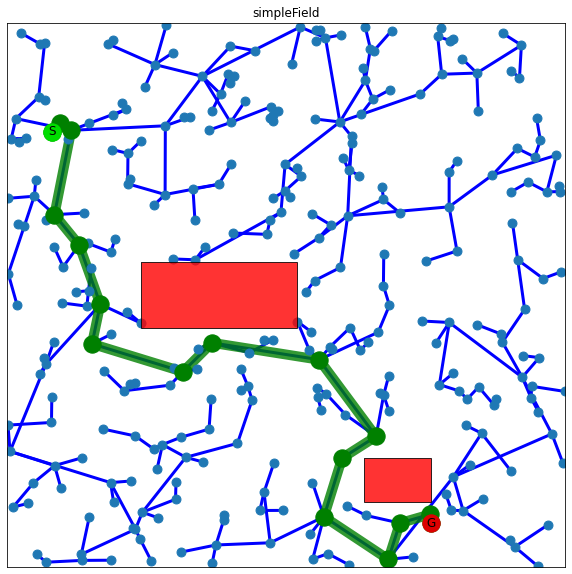

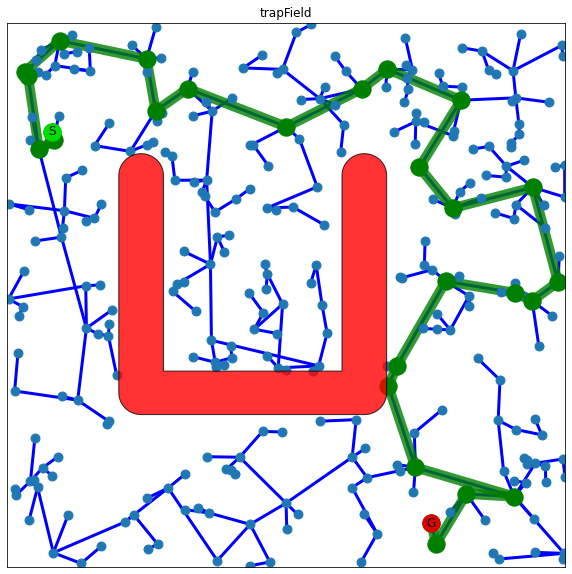

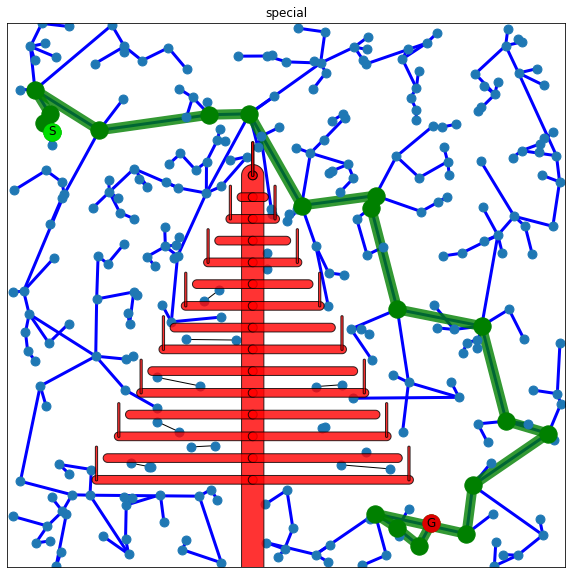

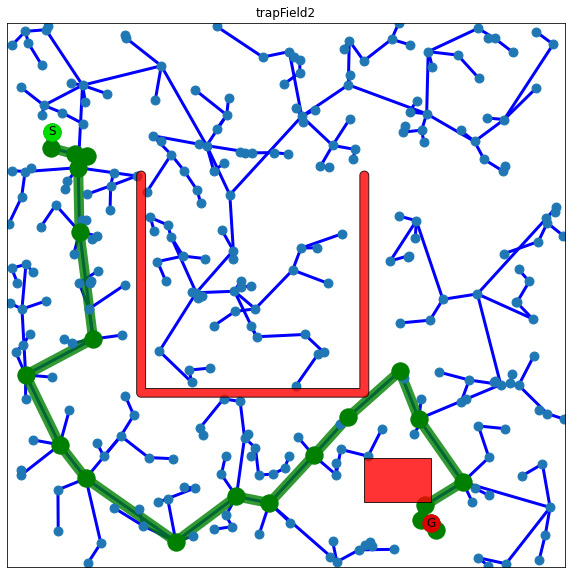

In [45]:
import testsuites
import collisionchecker
import importlib
importlib.reload(testsuites)

for testEnv in testsuites.testSuite:

    try:
        collChecker = collisionchecker.CollisionChecker(testEnv.scene,limits=testEnv.limits)
        
        G = nx.Graph()
        radius = 5
        numNodes = 300
        learnRoadmapNearestNeighbour(G, dim, radius, numNodes, collChecker)
        solution = findPath(G,testEnv.start,testEnv.goal, collChecker)
        print(solution)
        
    except Exception as e:
        solution = []
        print ("Failed", e)
    
    # draw the planning
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    limits=collChecker.getEnvironmentLimits()
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_title(testEnv.name)
    basicPRMVisualize(G,collChecker,solution,nodeSize=80,ax=ax)


Experiments
-------------

* Try the different ways to build up the roadmap and how this affects the structure of the roadmap by uncommenting corresponding function call
* Try different radius
* Try different size of roadmap

